# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [6]:
data = pd.read_csv(r"D:\Bala\CODSOFT-INTERNSHIP\Spam-SMS-Detection\spam.csv",encoding = 'ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

# **Dropping the unwanted columns**

In [21]:
data = data.drop(columns=data.columns[2:5])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.columns = ['Category', 'Message']
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### **To check the null value**

In [26]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

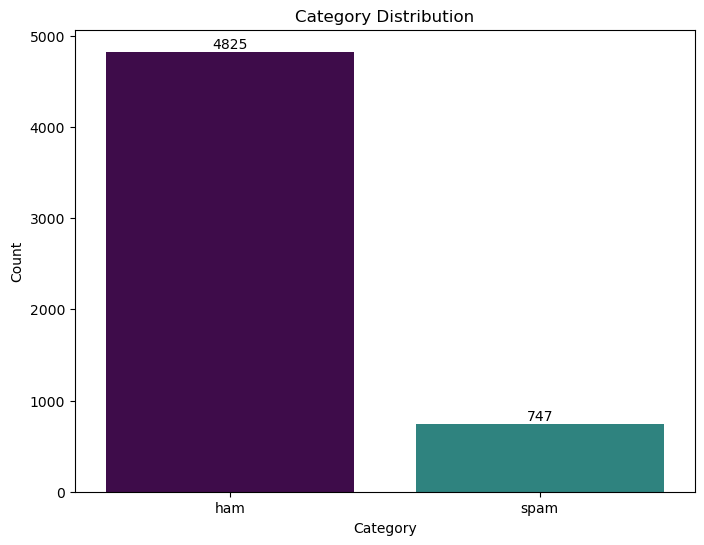

In [94]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

colors = sns.color_palette(sns.color_palette("viridis", as_cmap=True)([i/len(category_counts) for i in range(len(category_counts))]))
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count',hue='Category', data=category_counts,palette=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [96]:
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


#### **Training and testing of data**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.2)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [103]:
X_train_count

<4457x7757 sparse matrix of type '<class 'numpy.int64'>'
	with 59297 stored elements in Compressed Sparse Row format>

#### Applying the Naive Bayes Method

In [108]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

#### **In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.<br>On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [111]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

0.9847533632286996

In [113]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [115]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.<br>On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [118]:
clf.score(X_test,y_test)

0.9847533632286996

### Now design a pre_build model to detect spam and not spam message

In [123]:
# Pre-trained model
pretrained_model = model 
new_sentences = [
    r"Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"
]

new_sentences_count = featurer.transform(new_sentences)
# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

'Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML' is a spam message.


## <center>**Thank You**</center>